In [1]:
# Clone the Darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15298, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 15298 (delta 1), reused 6 (delta 0), pack-reused 15289
Receiving objects: 100% (15298/15298), 13.67 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (10380/10380), done.


In [2]:
# Enable GPU and OPENCV
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# Verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [4]:
# Make the Darknet build
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

## Test Pretrained Weights to Make Sure Darknet is Working

In [5]:
# Get YOLOv3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-08-04 04:11:38--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  71.5MB/s    in 3.5s    

2021-08-04 04:11:41 (66.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [6]:
# Show predictions
def imShow(path):
  import matplotlib.pyplot as plt
  import cv2
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# Upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# Download files
def download(path):
  from google.colab import files
  files.download(path)

In [7]:
# Run a test Darknet detection using a picture of a person
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

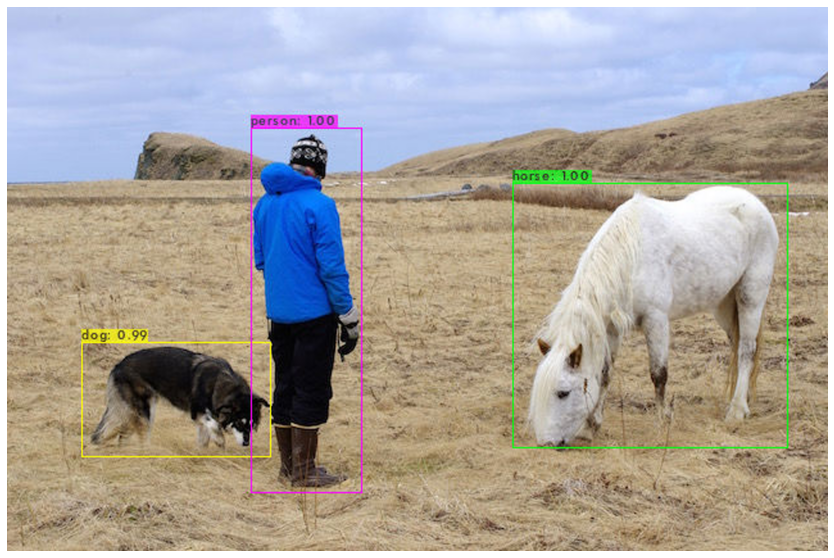

In [8]:
# Show the predicted image
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

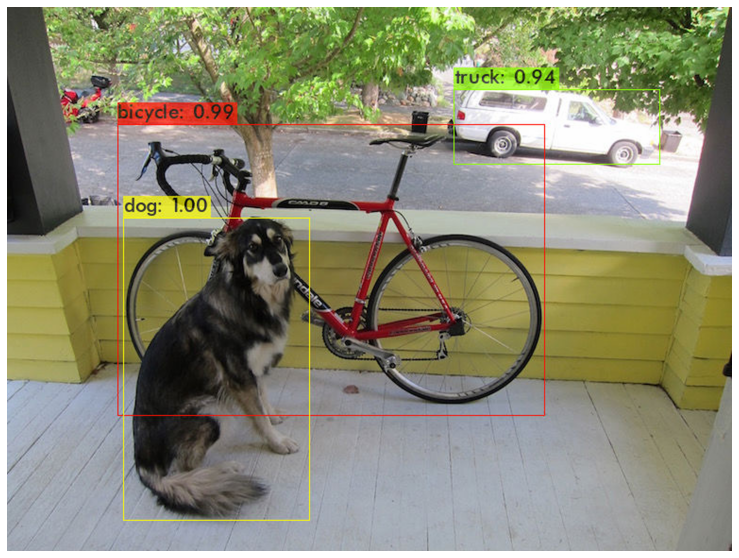

In [9]:
# (OPTIONAL) Do another test
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

## Set up the Algorithm

In [11]:
# Mount Google Drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [12]:
# Makes the path /content/gdrive/My\ Drive/ equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'2020 LAHS School Webinar.gdoc'
'2021 AP Test Notes'
'ACT Plan.gdoc'
'ACT Schedule.gsheet'
'Aeries LAHS'
'Aguirre Narrative Essays Unit Slides 2021 (3).pdf'
'Aguirre Research Unit Slides 2021 (1).pdf'
'Alien Idea.gdoc'
'All Missed ACT Questions.gsheet'
'All Released AP Exams'
 AP_exam_registration_confirmation325859874_1551070571.pdf
 APScoreReportNicholasJean.gdoc
 APScoreReportNicholasJean.pdf
'AP Scores'
'AP Test Practice'
 best.pt
'Bookmark Saves'
'Brian TTS Stuff.gdoc'
 Canvas
 CCCApplicationReview-FoothillCollege.pdf
 CC.jpg
'Chapter 2: The Biology of the Mind.gdoc'
 ChewBar.jpg
 Chinese
'Coding Project Guideline & Journal.gdoc'
'Coding Project Schedule.gsheet'
 ColabNotebooks
'College Application'
'College App Presentation Notes.gdoc'
'College Apps Ideas.gdoc'
 CollegeBoard
'College Essay Questions.gdoc'
'Computer Science'
'(Copy) Missing Chapter Explication Chart_Model 1.gdoc'
'(Copy) Missing Chapter_Model 1.gdoc'
'Copy Nicholas Jean - AmLit Final Reflection Letter.gdoc'
'(Copy

In [13]:
# Print a list of all files of yolov3 folder
!ls /content/gdrive/MyDrive/ColabNotebooks/yolov3

 backup
'Copy of Monkey Health Prototype 1 YOLOv3_Tutorial.ipynb'
 generate_train.py
 images
'Monkey Health Article Journal.gdoc'
'Monkey Health Prototype 1 YOLOv3_Tutorial.ipynb'
 obj2.zip
 obj3.zip
 obj.data
 obj.names
 obj.zip
 yolov3_custom.cfg
 yolov3_custom.cfg.gdoc
 yolov3_custom_OG.cfg


In [14]:
# Make sure we are on the darknet directory
# Sometimes, a folder called "data" will be created outside of the darknet folder when unzipping the obj.zip file
# so we do this to make sure the obj.zip file is unzipped inside the /darknet/data/obj directory
import os
os.chdir('/content/darknet')

In [15]:
# Copy the .zip file into the root directory of cloud VM
!cp /content/gdrive/MyDrive/ColabNotebooks/yolov3/obj.zip ../

In [16]:
# Unzip the zip file
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/classes.txt    
  inflating: data/obj/MH1.jpeg       
  inflating: data/obj/MH1.txt        
  inflating: data/obj/MH10.jpeg      
  inflating: data/obj/MH10.txt       
  inflating: data/obj/MH100.jpeg     
  inflating: data/obj/MH100.txt      
  inflating: data/obj/MH101.jpeg     
  inflating: data/obj/MH101.txt      
  inflating: data/obj/MH102.jpeg     
  inflating: data/obj/MH102.txt      
  inflating: data/obj/MH103.jpeg     
  inflating: data/obj/MH103.txt      
  inflating: data/obj/MH104.jpeg     
  inflating: data/obj/MH104.txt      
  inflating: data/obj/MH105.jpeg     
  inflating: data/obj/MH105.txt      
  inflating: data/obj/MH106.jpeg     
  inflating: data/obj/MH106.txt      
  inflating: data/obj/MH107.jpeg     
  inflating: data/obj/MH107.txt      
  inflating: data/obj/MH108.jpeg     
  inflating: data/obj/MH108.txt      
  inflating: data/obj/MH109.jpeg     
  inflating: data/obj/MH109.txt      
  inflating: data/obj/MH11.jp

In [17]:
# Upload the custom .cfg file back to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/ColabNotebooks/yolov3/yolov3_custom.cfg ./cfg

In [18]:
# Upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/ColabNotebooks/yolov3/obj.names ./data
!cp /content/gdrive/MyDrive/ColabNotebooks/yolov3/obj.data  ./data

In [19]:
# Upload the generate_train.py script to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/ColabNotebooks/yolov3/generate_train.py ./

In [20]:
# Run the Python script
!python generate_train.py

In [21]:
# Verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


The step below downloads the weights for the convolutional layers of the YOLOv3 network. While it is not necessary, these weights it help my object detector to be much more accurate and train much quicker.

In [22]:
# Upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-08-04 04:14:16--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  64.0MB/s    in 2.4s    

2021-08-04 04:14:18 (64.0 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



## Run the Algorithm

In [23]:
# Set custom .cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

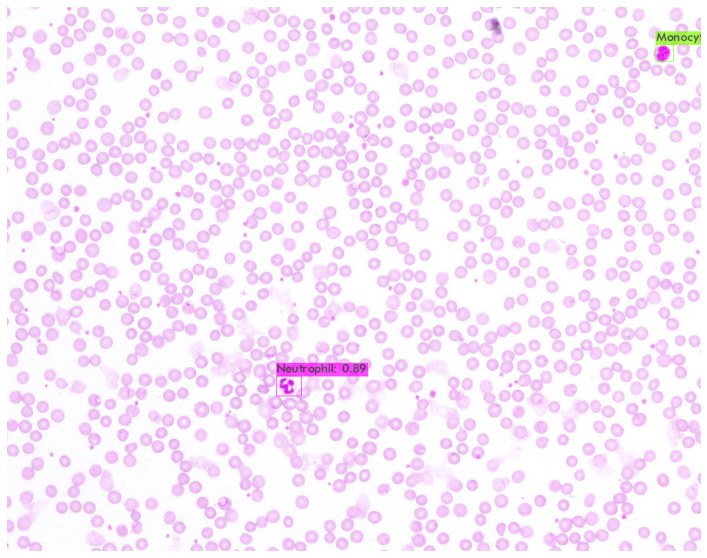

In [26]:
# Run the object detector based on an image from Google Drive
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/gdrive/MyDrive/ColabNotebooks/yolov3/backup/yolov3_custom_last.weights /content/gdrive/MyDrive/ColabNotebooks/yolov3/images/MHTestImage3.jpeg -thresh 0.5 -dont_show
imShow('predictions.jpg')

!cp predictions.jpg /content/gdrive/MyDrive/ColabNotebooks/yolov3/images/MH3Detection.jpeg